In [2]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = r"C:\Users\chris\Corporate_Environmental_Impact\data\raw\Scope-3-Environmental-Impact-Data-2022.xlsx"

df = pd.read_excel(file_path, sheet_name="0%")

# Prüfen ob es fehlende Werte gibt
print(df.isnull().sum())

# Zeilen mit fehlenden Werten entfernen
df=df.dropna()

# Nicht relevante Spalten entfernen (Angaben ob Wert geschätzt oder für ML verwendet wurde)
df = df.loc[:, ~df.columns.str.contains('Imputed|Set', case=False)]
print(df.columns)

# Nach Auffälligkeiten in den numerischen Wertenschauen
df.describe()


Year                                                                           0
Company Name                                                                   0
Country                                                                        0
Industry (Exiobase)                                                            0
GHG Intensity (Sales)                                                          5
GHG Intensity (Op Income)                                                    341
Total GHG Environmental Impact (Scope 1, 2, 3)                                 0
Scope 1                                                                        0
Scope 2                                                                        0
Scope 3                                                                        0
Business Travel                                                                0
Business Travel Set                                                            0
Business Travel Imputed     

,Year,GHG Intensity (Sales),GHG Intensity (Op Income),"Total GHG Environmental Impact (Scope 1, 2, 3)",Scope 1,Scope 2,Scope 3,Business Travel,Capital Goods,Downstream Transportation and Distribution,Employee Commuting,End of Life Treatment of Sold Products,Franchises,Fuel-and-energy-related activities (not included in Scope 1 or 2),Investments,Processing of Sold Products,Purchased Goods and Services,Upstream Transportation and Distribution,Use of Sold Products,Waste Generated in Operations
count,8672.000000,8672.000000,8672.000000,8.672000e+03,8.672000e+03,8.672000e+03,8.672000e+03,8.672000e+03,8.672000e+03,8.672000e+03,8.672000e+03,8.672000e+03,8.672000e+03,8.672000e+03,8.672000e+03,8.672000e+03,8.672000e+03,8.672000e+03,8.672000e+03,8.672000e+03
mean,2015.801891,-0.588776,-11.402280,-7.710142e+09,-1.092805e+09,-2.289068e+08,-6.388430e+09,-7.965346e+06,-6.974595e+07,-9.687343e+07,-1.318875e+07,-1.098518e+08,-6.681545e+06,-2.461024e+08,-8.667819e+07,-6.095466e+08,-8.827874e+08,-9.595450e+07,-4.124770e+09,-1.082024e+07
std,2.276971,2.100577,142.246921,2.377177e+10,4.171874e+09,9.828335e+08,2.189212e+10,2.052009e+07,2.422768e+08,5.020922e+08,4.986095e+07,5.711034e+08,8.594748e+07,1.825240e+09,2.107182e+09,6.495969e+09,4.040470e+09,6.692221e+08,1.752739e+10,4.803965e+07
min,2012.000000,-78.088543,-10592.403045,-3.282679e+11,-8.111019e+10,-5.452905e+10,-3.167183e+11,-5.611047e+08,-1.086743e+10,-1.835087e+10,-1.193904e+09,-1.441848e+10,-3.496514e+09,-7.212674e+10,-1.150483e+11,-1.757591e+11,-1.379600e+11,-2.828235e+10,-2.921609e+11,-1.269644e+09
25%,2014.000000,-0.481228,-6.210165,-4.837028e+09,-2.253072e+08,-1.708296e+08,-3.285585e+09,-6.139012e+06,-5.763972e+07,-3.881552e+07,-8.378376e+06,-3.023471e+07,0.000000e+00,-4.778639e+07,0.000000e+00,-5.264077e+07,-5.524829e+08,-4.472684e+07,-1.255365e+09,-4.738771e+06
50%,2016.000000,-0.167914,-1.834792,-1.045216e+09,-3.182221e+07,-4.743479e+07,-8.193584e+08,-1.750019e+06,-1.740900e+07,-9.254395e+06,-2.432200e+06,-5.148823e+06,0.000000e+00,-8.998233e+06,0.000000e+00,-1.820715e+07,-9.904682e+07,-8.524466e+06,-2.398979e+08,-1.178435e+06
75%,2018.000000,-0.064248,-0.593180,-2.427676e+08,-4.838896e+06,-1.103823e+07,-1.886043e+08,-5.117396e+05,-5.623817e+06,-2.666166e+06,-6.569673e+05,-9.042776e+05,0.000000e+00,-2.083660e+06,0.000000e+00,-6.727471e+06,-1.115581e+07,-2.517195e+06,-3.613705e+07,-2.185680e+05
max,2020.000000,-0.001264,-0.013839,-4.638598e+06,-2.210948e+02,-8.022581e+02,-4.123901e+06,-2.210948e+00,-5.085179e+01,-8.212091e+01,-3.158497e-01,-5.685294e+01,0.000000e+00,-2.526797e+00,0.000000e+00,-7.264542e+02,-7.896241e+01,-4.106046e+01,-3.158497e+00,-8.212091e+00


In [3]:
min_emission=df['Total GHG Environmental Impact (Scope 1, 2, 3)'].min()
print(f"{min_emission:,.2f}")

max_emission=df['Total GHG Environmental Impact (Scope 1, 2, 3)'].max()
print(f"{max_emission:,.2f}")

# Zeile mit größtem GHG Impact
min_row = df[df['Total GHG Environmental Impact (Scope 1, 2, 3)'] == min_emission]

# Zeile mit niedrigstem GHG Impact
max_row = df[df['Total GHG Environmental Impact (Scope 1, 2, 3)'] == max_emission]

min_row
max_row


-328,267,922,499.31
-4,638,597.67


,Year,Company Name,Country,Industry (Exiobase),GHG Intensity (Sales),GHG Intensity (Op Income),"Total GHG Environmental Impact (Scope 1, 2, 3)",Scope 1,Scope 2,Scope 3,...,Employee Commuting,End of Life Treatment of Sold Products,Franchises,Fuel-and-energy-related activities (not included in Scope 1 or 2),Investments,Processing of Sold Products,Purchased Goods and Services,Upstream Transportation and Distribution,Use of Sold Products,Waste Generated in Operations
7194,2013,ODONTOPREV SA,BRAZIL,Health and social work (85),-0.010243,-0.041662,-4.638598e+06,-366973.647412,-147722.884064,-4.123901e+06,...,-43514.607093,-222358.157754,0.0,-55589.539438,0.0,-2.561541e+06,-166136.919003,-103598.687135,-364522.087874,-4106.045527


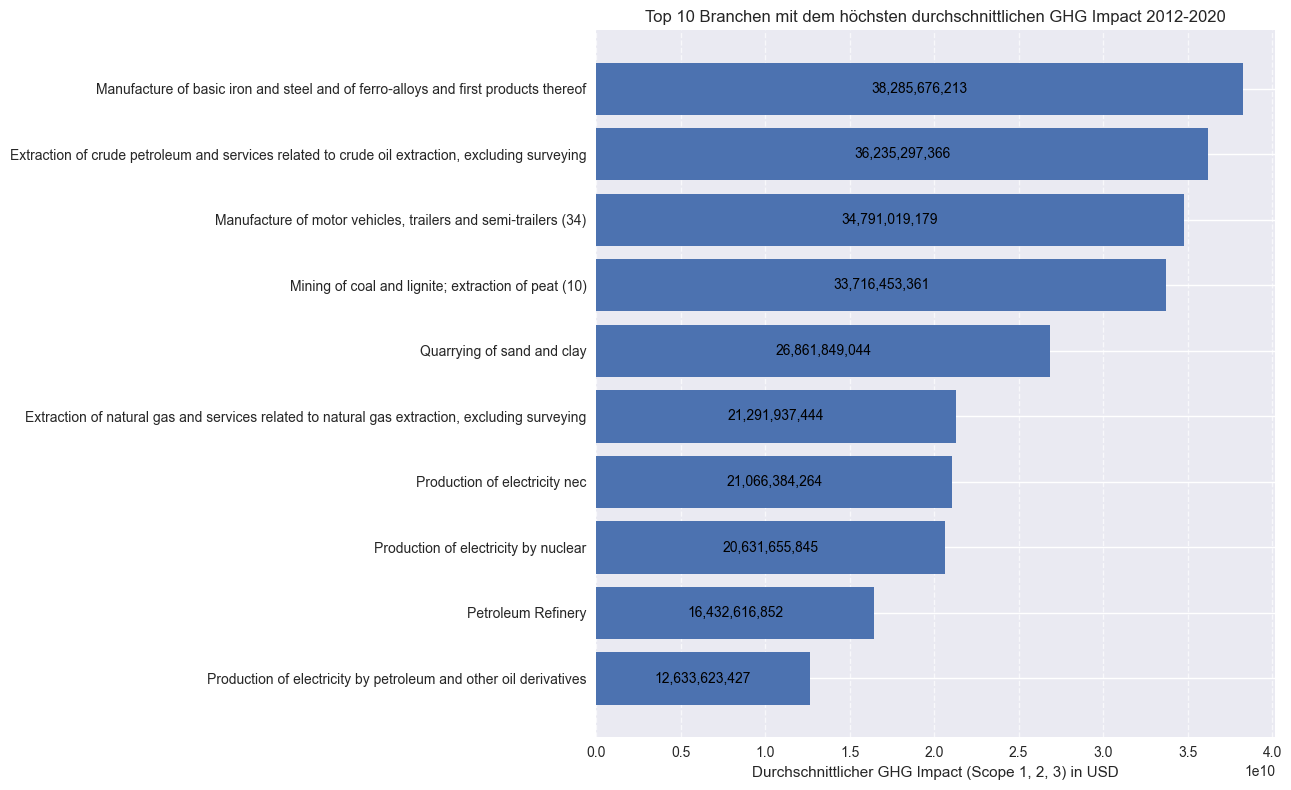

In [4]:
# Umwandlung in positive GHG-Werte, Gruppiert nach Industry/Branche
top_10_industries = df.groupby('Industry (Exiobase)')['Total GHG Environmental Impact (Scope 1, 2, 3)'].mean().abs().sort_values(ascending=False).head(10)

# Balkendiagramm erstellen
plt.figure(figsize=(13, 8)) 
plt.style.use('seaborn-v0_8')

bars = plt.barh(
    top_10_industries.index, 
    top_10_industries, 
)
# Werte im Balken anzeigen
for bar in bars:
    width = bar.get_width()
    formatted_value = f'{width:,.0f}'
    plt.text(width / 2, bar.get_y() + bar.get_height()/2, formatted_value, va='center', ha='center', fontsize=10, color='black')

plt.xlabel('Durchschnittlicher GHG Impact (Scope 1, 2, 3) in USD')
plt.title('Top 10 Branchen mit dem höchsten durchschnittlichen GHG Impact 2012-2020', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('top_10_indrusties_emissions.png')
plt.show()



C:\Users\chris\AppData\Local\Temp\ipykernel_4120\759430898.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = scope1[i] + scope2[i] + scope3[i]


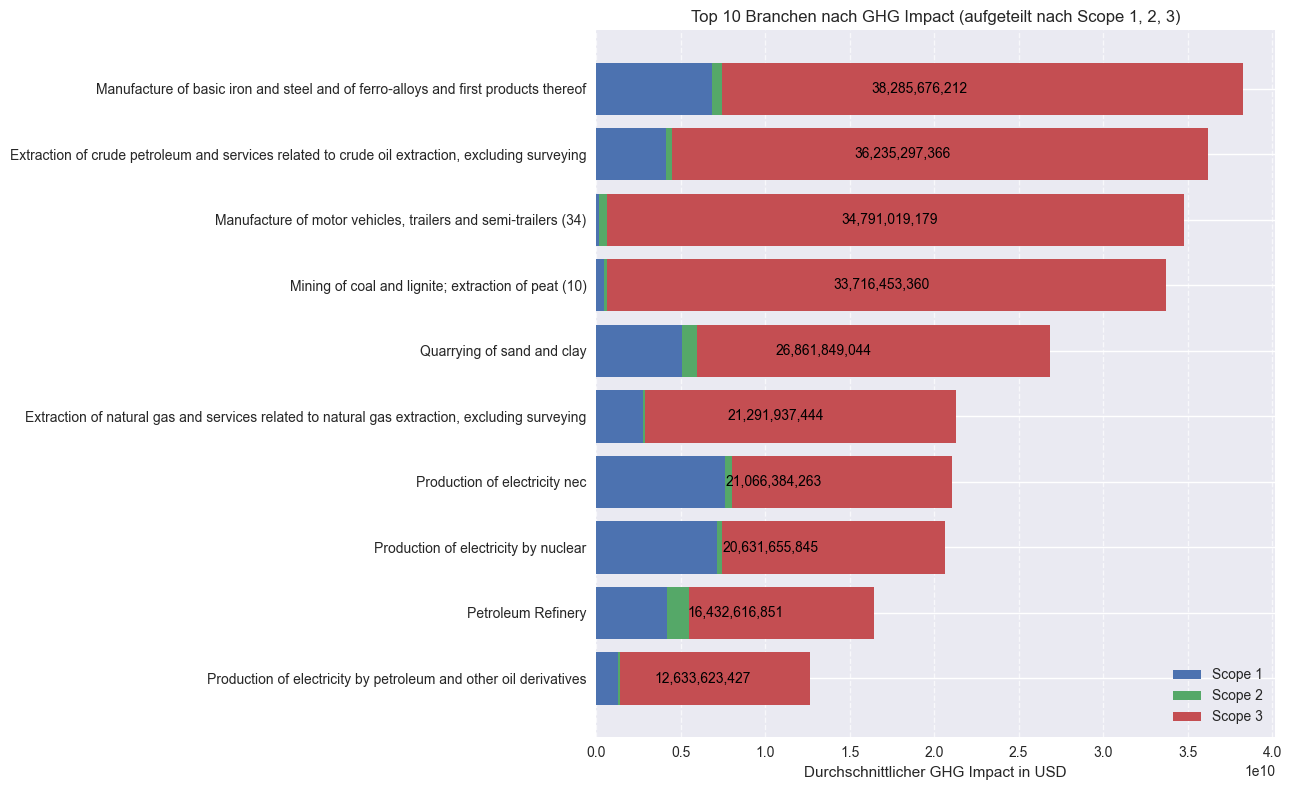

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Spaltennamen bereinigen
df.columns = df.columns.str.strip()

# relevante Spalten kopieren
df_scope = df[['Industry (Exiobase)', 'Scope 1', 'Scope 2', 'Scope 3']].copy()

# In positive Werte umwandeln
df_scope[['Scope 1', 'Scope 2', 'Scope 3']] = df_scope[['Scope 1', 'Scope 2', 'Scope 3']].abs()

# Gruppieren und Durchschnitt berechnen
mean_by_industry = df_scope.groupby('Industry (Exiobase)').mean()

# Gesamt-Impact berechnen
mean_by_industry['Total'] = mean_by_industry[['Scope 1', 'Scope 2', 'Scope 3']].sum(axis=1)

# Top 10 Industrien mit höchstem durchschnittlichem GHG Impact
top_10 = mean_by_industry.sort_values(by='Total', ascending=False).head(10)

# Fürs gestapelte Balkendiagramm vorbereiten
industries = top_10.index
scope1 = top_10['Scope 1']
scope2 = top_10['Scope 2']
scope3 = top_10['Scope 3']

# Abbildung erstellen
plt.figure(figsize=(13, 8))
plt.style.use('seaborn-v0_8')

bar1 = plt.barh(industries, scope1, label='Scope 1')
bar2 = plt.barh(industries, scope2, left=scope1, label='Scope 2')
bar3 = plt.barh(industries, scope3, left=scope1 + scope2, label='Scope 3')

# Werte im Balken anzeigen (optional)
for i in range(len(industries)):
    total = scope1[i] + scope2[i] + scope3[i]
    plt.text(total / 2, i, f'{int(total):,}', va='center', ha='center', fontsize=10, color='black')

# Achsentitel und Legende
plt.xlabel('Durchschnittlicher GHG Impact in USD')
plt.title('Top 10 Branchen nach GHG Impact (aufgeteilt nach Scope 1, 2, 3)', fontsize=12)
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('top_10_branches_scopes_stacked.png')
plt.show()


In [ ]:
# print(top_10_industries)

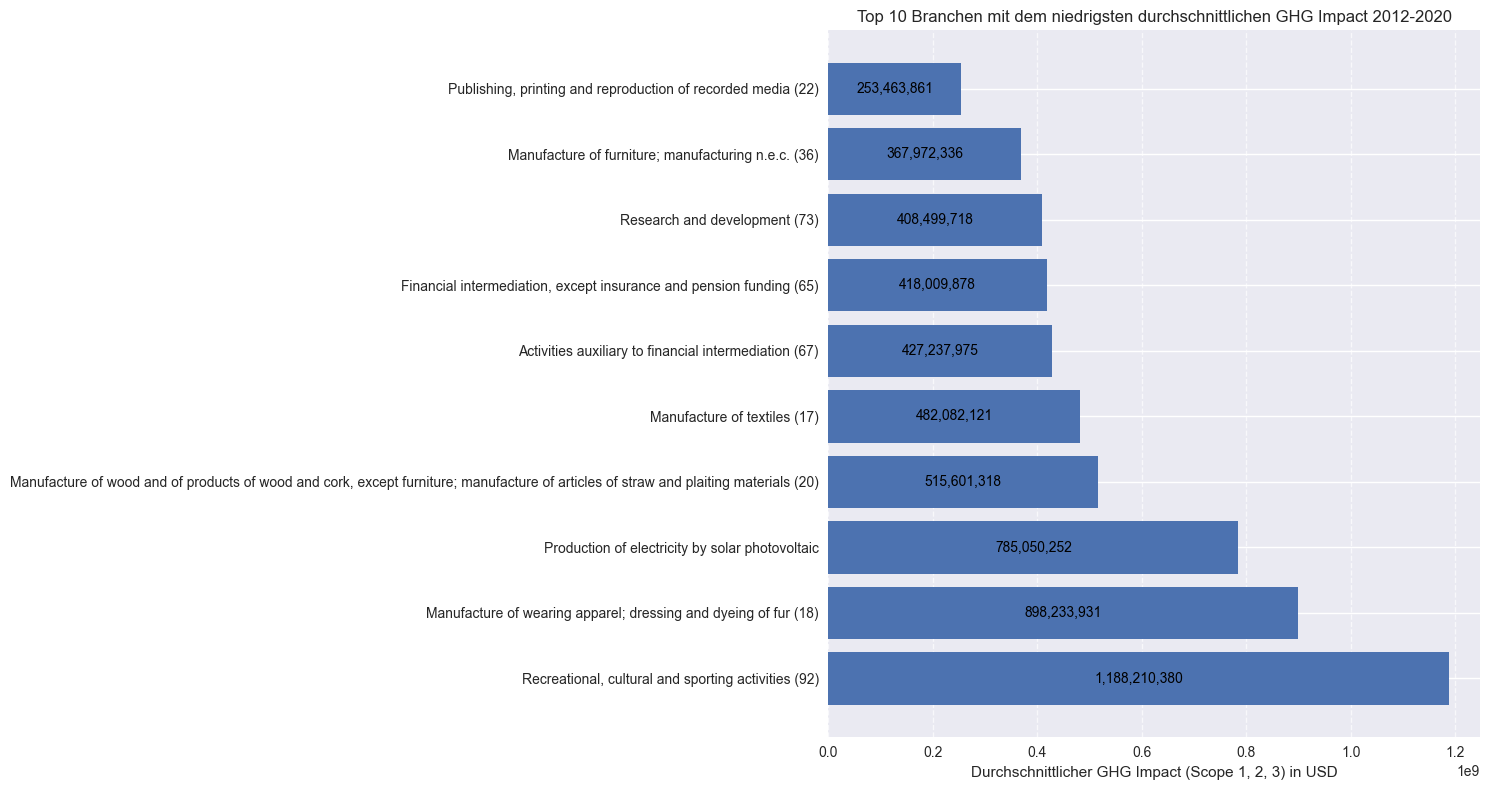

In [ ]:
# Umwandlung in positive GHG-Werte, Gruppiert nach Industry/Branche
top_10_low_emissions = df.groupby('Industry (Exiobase)')['Total GHG Environmental Impact (Scope 1, 2, 3)'].mean().abs().sort_values(ascending=True).head(10)

# Balkendiagramm erstellen
plt.figure(figsize=(15, 8)) 
plt.style.use('seaborn-v0_8')

bars = plt.barh(
    top_10_low_emissions.index, 
    top_10_low_emissions, 
)
# Werte im Balken anzeigen
for bar in bars:
    width = bar.get_width()
    formatted_value = f'{width:,.0f}'
    plt.text(width / 2, bar.get_y() + bar.get_height()/2, formatted_value, va='center', ha='center', fontsize=10, color='black')

plt.xlabel('Durchschnittlicher GHG Impact (Scope 1, 2, 3) in USD')
plt.title('Top 10 Branchen mit dem niedrigsten durchschnittlichen GHG Impact 2012-2020', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('top_10_low_emission_industries.png')
plt.show()


In [ ]:
print(top_10_low_emissions)

Industry (Exiobase)
Publishing, printing and reproduction of recorded media (22)                                                                            2.534639e+08
Manufacture of furniture; manufacturing n.e.c. (36)                                                                                     3.679723e+08
Research and development (73)                                                                                                           4.084997e+08
Financial intermediation, except insurance and pension funding (65)                                                                     4.180099e+08
Activities auxiliary to financial intermediation (67)                                                                                   4.272380e+08
Manufacture of textiles (17)                                                                                                            4.820821e+08
Manufacture of wood and of products of wood and cork, except furniture; manufacture of

In [ ]:
import plotly.graph_objects as go

# Series in Liste umwandeln
top_10_low_emission_industries = top_10_low_emissions.index.tolist()

# Top 10 Branchen mit niedrigem Impact auswählen
df_filtered = df[df['Industry (Exiobase)'].isin(top_10_low_emission_industries)]

# Gruppieren nach Jahr und Branche, Durchschnitt berechnen
ghg_by_year = df_filtered.groupby(['Year', 'Industry (Exiobase)'])['Total GHG Environmental Impact (Scope 1, 2, 3)'].mean().abs().reset_index()

# Leere Figur für Plotly
fig = go.Figure()

# Für jede Branche eine Linie hinzufügen
for industry in top_10_low_emission_industries:
    data = ghg_by_year[ghg_by_year['Industry (Exiobase)'] == industry]
    fig.add_trace(go.Scatter(
        x=data['Year'], 
        y=data['Total GHG Environmental Impact (Scope 1, 2, 3)'],
        mode='lines',
        name=industry, 
        line=dict(width=2), 
    ))

# Layout
fig.update_layout(
    title='Zeitlicher Verlauf des durchschnittlichen GHG Impacts (2012–2020) – Top 10 Branchen mit niedrigstem Impact',
    xaxis_title='Jahr',
    yaxis_title='Durchschnittlicher GHG Impact in Milliarden (B)',
    template='seaborn', 
    legend_title='Branche',
    legend=dict(
        x=1.05, 
        y=1,
        traceorder='normal',
        bgcolor='rgba(255, 255, 255, 0)',  
        borderwidth=0,
    ),
    showlegend=True 
)
fig.write_html("../ghg_trend_top_10_low_impact.html")
fig.show()


In [ ]:
# photovoltaic production untersuchen 
# Filter erstellen
maske = (df['Industry (Exiobase)'] == 'Production of electricity by solar photovoltaic')

# Gefilterte Daten anzeigen
df_photovoltaic = df[maske]
print(df_photovoltaic)

# 15 Unternehmen insg. -> Hinzukommen neuer Unternehmen sorgt für starken Anstieg

      Year             Company Name         Country  \
122   2019      NORTHLAND POWER INC          CANADA   
475   2019      ATLANTICA YIELD PLC  UNITED KINGDOM   
909   2019               SCATEC ASA          NORWAY   
921   2019      MERIDIAN ENERGY LTD     NEW ZEALAND   
1224  2019   ORMAT TECHNOLOGIES INC   UNITED STATES   
1802  2018      ATLANTICA YIELD PLC  UNITED KINGDOM   
2214  2018               SCATEC ASA          NORWAY   
3827  2016           INFIGEN ENERGY       AUSTRALIA   
4596  2016  ENERGY DEVELOPMENT CORP     PHILIPPINES   
4981  2015           INFIGEN ENERGY       AUSTRALIA   
5960  2015   ORMAT TECHNOLOGIES INC   UNITED STATES   
6147  2014             AES TIETE SA          BRAZIL   
7995  2013   ORMAT TECHNOLOGIES INC   UNITED STATES   
8157  2012             AES TIETE SA          BRAZIL   
8917  2012   ORMAT TECHNOLOGIES INC   UNITED STATES   

                                  Industry (Exiobase)  GHG Intensity (Sales)  \
122   Production of electricity by sola

In [ ]:
# Manufacture of textiles (17) untersuchen
# Filter erstellen
maske = (df['Industry (Exiobase)'] == 'Manufacture of textiles (17)')

# Gefilterte Daten anzeigen
df_textiles = df[maske]
print(df_textiles)

# Schwankungen entstehen durch fehlende Kontinuierlichkeit der berichtenden Unternehmen, sehr geringe Anzahl an Unternehmen

      Year                Company Name         Country  \
1011  2019      FORMOSA TAFFETA CO LTD          TAIWAN   
2306  2018        ECLAT TEXTILE CO LTD          TAIWAN   
3081  2017                  ARVIND LTD           INDIA   
4662  2016      FORMOSA TAFFETA CO LTD          TAIWAN   
5785  2015  YUNSA YUNLI SANAYI TICARET          TURKEY   
6851  2014  YUNSA YUNLI SANAYI TICARET          TURKEY   
7835  2013  YUNSA YUNLI SANAYI TICARET          TURKEY   
8454  2012                FIBERWEB PLC  UNITED KINGDOM   
8770  2012  YUNSA YUNLI SANAYI TICARET          TURKEY   

               Industry (Exiobase)  GHG Intensity (Sales)  \
1011  Manufacture of textiles (17)              -1.004549   
2306  Manufacture of textiles (17)              -0.209012   
3081  Manufacture of textiles (17)              -0.661697   
4662  Manufacture of textiles (17)              -1.232234   
5785  Manufacture of textiles (17)              -0.719882   
6851  Manufacture of textiles (17)              -0.40

In [ ]:
# Untersuche Manufacture of wood and of products of wood and cork, except furniture; manufacture of articles of straw and plaiting materials (20)
maske = (df['Industry (Exiobase)'] == 'Manufacture of wood and of products of wood and cork, except furniture; manufacture of articles of straw and plaiting materials (20)')

# Gefilterte Daten anzeigen
df_wood = df[maske]
print(df_wood)

# Zwei Unternehmen insg. -> sinkende Kosten bei diesen Unternehmen


      Year   Company Name        Country  \
271   2019     FISKARS OY        FINLAND   
1603  2018     FISKARS OY        FINLAND   
2496  2018  NEWELL BRANDS  UNITED STATES   
7011  2014  NEWELL BRANDS  UNITED STATES   
7985  2013  NEWELL BRANDS  UNITED STATES   

                                    Industry (Exiobase)  \
271   Manufacture of wood and of products of wood an...   
1603  Manufacture of wood and of products of wood an...   
2496  Manufacture of wood and of products of wood an...   
7011  Manufacture of wood and of products of wood an...   
7985  Manufacture of wood and of products of wood an...   

      GHG Intensity (Sales)  GHG Intensity (Op Income)  \
271               -0.262789                  -4.906587   
1603              -0.372146                  -4.354029   
2496              -0.049247                  -0.740494   
7011              -0.100803                  -0.798591   
7985              -0.136509                  -1.061435   

      Total GHG Environmental I

In [ ]:
# Untersuche Publishing, printing and reproduction of recorded media (22)

# Filter erstellen
maske = (df['Industry (Exiobase)'] == 'Publishing, printing and reproduction of recorded media (22)')

# Gefilterte Daten anzeigen
df_print = df[maske]
print(df_print)

# 152 Unternehmen, kontinuierlicher Abstieg

      Year               Company Name        Country  \
12    2020       MEREDITH CORPORATION  UNITED STATES   
104   2019                COGECO INC.         CANADA   
157   2019                 APG SGA SA    SWITZERLAND   
220   2019    PROSIEBENSAT.1 MEDIA SE        GERMANY   
247   2019  ATRESMEDIA CORP DE MEDIOS          SPAIN   
...    ...                        ...            ...   
8682  2012                     SES SA     LUXEMBOURG   
8701  2012              SCHIBSTED ASA         NORWAY   
8910  2012           NEWS CORPORATION  UNITED STATES   
8915  2012         OMNICOM GROUP INC.  UNITED STATES   
8949  2012           TIME WARNER INC.  UNITED STATES   

                                    Industry (Exiobase)  \
12    Publishing, printing and reproduction of recor...   
104   Publishing, printing and reproduction of recor...   
157   Publishing, printing and reproduction of recor...   
220   Publishing, printing and reproduction of recor...   
247   Publishing, printing and r

In [ ]:
# Zeitlicher Verlauf der Emissionen der TOP 10 Branchen mit höchstem Impact

# Series in Liste umwandeln
top_10_high_emission_industries = top_10_industries.index.tolist()

# Top 10 Branchen mit niedrigem Impact auswählen
df_filtered = df[df['Industry (Exiobase)'].isin(top_10_high_emission_industries)]

# Gruppieren nach Jahr und Branche, Durchschnitt berechnen
ghg_by_year = df_filtered.groupby(['Year', 'Industry (Exiobase)'])['Total GHG Environmental Impact (Scope 1, 2, 3)'].mean().abs().reset_index()

# leere Figure
fig = go.Figure()

# Für jede Branche eine Linie hinzufügen
for industry in top_10_high_emission_industries:
    data = ghg_by_year[ghg_by_year['Industry (Exiobase)'] == industry]
    fig.add_trace(go.Scatter(
        x=data['Year'], 
        y=data['Total GHG Environmental Impact (Scope 1, 2, 3)'],
        mode='lines',
        name=industry, 
        line=dict(width=2), 
    ))

# Layout anpassen
fig.update_layout(
    title='Zeitlicher Verlauf des durchschnittlichen GHG Impacts (2012–2020) – Top 10 Branchen mit höchstem Impact',
    xaxis_title='Jahr',
    yaxis_title='Durchschnittlicher GHG Impact in Milliarden (B)',
    template='seaborn', 
    legend_title='Branche',
    legend=dict(
        x=1.05, 
        y=1,
        traceorder='normal',
        bgcolor='rgba(255, 255, 255, 0)',
        borderwidth=0,
    ),
    showlegend=True 
)

fig.write_html("../ghg_trend_top_10_high_impact.html")

fig.show()

In [ ]:
# Untersuchen warum Mining of coal and lignite einen peak in 2018 hat
# Filter erstellen
maske = (
    (df['Industry (Exiobase)'] == 'Mining of coal and lignite; extraction of peat (10)') &
    (df['Year'] == 2018))

# Gefilterte Daten anzeigen
df_mining_2018 = df[maske]
print(df_mining_2018)

# Alle Unternehmen im Gesamtzeitraum anzeigen, um mit Ausreißer zu vergleichen
maske = (df['Industry (Exiobase)'] == 'Mining of coal and lignite; extraction of peat (10)') 

df_mining_total = df[maske]
print(df_mining_total)

## Ausreißer ist auf ein Unternehnmen zurückzuführen -> möglicherweise durch neue Abbauprojekte
## 11 Mining company Einträge, davon 8 von einem Unternehmen

      Year          Company Name        Country  \
2385  2018     CONSOL ENERGY INC  UNITED STATES   
2615  2018  EXXARO RESOURCES LTD   SOUTH AFRICA   

                                    Industry (Exiobase)  \
2385  Mining of coal and lignite; extraction of peat...   
2615  Mining of coal and lignite; extraction of peat...   

      GHG Intensity (Sales)  GHG Intensity (Op Income)  \
2385             -15.941945                 -89.411746   
2615             -78.088543                -341.491687   

      Total GHG Environmental Impact (Scope 1, 2, 3)       Scope 1  \
2385                                   -2.438008e+10 -2.281099e+09   
2615                                   -1.386023e+11 -9.962277e+07   

           Scope 2      Scope 3   ...  Employee Commuting  \
2385 -9.248741e+07 -2.200649e+10  ...       -3.598159e+06   
2615 -1.743669e+08 -1.383284e+11  ...       -4.801546e+06   

      End of Life Treatment of Sold Products  Franchises  \
2385                           -826578